Overview: Reviewing meta-analysis on mental health and its impact factors:

Question 1:
    * Does Gender play a significant role in mental health?

Hypothesis:
    * Females have a higher chance of having a history of mental health. 

Explanation: 
    * Gender vs. Mental Health History by means of self-reported survey.

Conclusion: 
    * The Chi-Squared test helps to statistically determine if there is a significant association between occupation and mental health history. Based on the p-value, it is concluded whether or not such an association exists.
    * This comprehensive analysis helps in understanding how mental health history varies across the different genders and whether these variations are statistically significant.
    * A p-value of 1.0 strongly supports the null hypothesis, indicating that there is no evidence of a relationship between gender and mental health history based on your sample. This suggests that any observed differences in mental health history between genders are due to random chance rather than a systematic difference.

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
df_main = pd.read_csv("files/Mental-Health-Dataset.csv")
df_main.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
short_df = df_main.copy()
short_df = df_main.groupby('Gender').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)
short_df

/var/folders/gq/mq07s6b53jx7p5v4jtvf7mrw0000gp/T/ipykernel_16492/2826684600.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  short_df = df_main.groupby('Gender').apply(lambda x: x.sample(n=10000, random_state=1)).reset_index(drop=True)


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/28/2014 9:16,Female,United Kingdom,Student,No,No,No,31-60 days,No,Yes,No,Medium,Yes,Maybe,Maybe,No,No
1,8/27/2014 17:56,Female,United States,Corporate,No,Yes,Yes,Go out Every day,No,Yes,Yes,Medium,No,No,Maybe,No,Yes
2,8/29/2014 10:06,Female,United States,Corporate,No,Yes,Yes,15-30 days,Maybe,Maybe,No,High,Yes,Yes,No,No,Yes
3,8/29/2014 14:51,Female,United States,Business,No,Yes,Yes,15-30 days,Maybe,Yes,No,High,Yes,Yes,Yes,No,Yes
4,8/28/2014 14:31,Female,United States,Others,No,No,No,More than 2 months,Maybe,No,No,Medium,No,No,Maybe,No,Not sure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8/28/2014 11:34,Male,United States,Others,No,No,Yes,1-14 days,Maybe,Yes,Maybe,Low,Yes,Maybe,Maybe,No,Yes
19996,8/27/2014 19:41,Male,United States,Student,No,No,Yes,15-30 days,Yes,Yes,Maybe,Medium,Yes,Maybe,No,Maybe,No
19997,8/27/2014 14:31,Male,United States,Housewife,Yes,No,No,Go out Every day,Maybe,No,Maybe,Low,Yes,Maybe,No,No,Yes
19998,8/28/2014 11:34,Male,United States,Corporate,No,No,Yes,15-30 days,Yes,No,Yes,High,Yes,Maybe,Maybe,No,Yes


In [4]:
males_yes = short_df[(short_df['Gender'] == 'Male') & (short_df['Mental_Health_History'] == 'Yes')]
males_no = short_df[(short_df['Gender'] == 'Male') & (short_df['Mental_Health_History'] == 'No')]
female_yes = short_df[(short_df['Gender'] == 'Female') & (short_df['Mental_Health_History'] == 'Yes')]
female_no = short_df[(short_df['Gender'] == 'Female') & (short_df['Mental_Health_History'] == 'No')]

counts = {
    'Gender': ['Male', 'Male', 'Female', 'Female'], 
    'Mental_Health_History': ['Yes', 'No', 'Yes', 'No'],
    'Count': [len(males_yes), len(males_no), len(female_yes), len(female_no)]
}

gender_mental_health = pd.DataFrame(counts)

gender_mental_health

,Gender,Mental_Health_History,Count
0,Male,Yes,3226
1,Male,No,3614
2,Female,Yes,3007
3,Female,No,3331


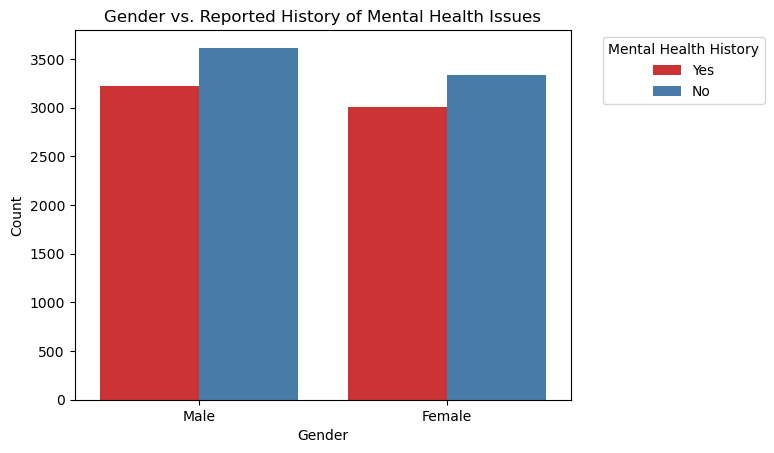

In [5]:
sns.barplot(data=gender_mental_health, x='Gender', y='Count', hue='Mental_Health_History', palette='Set1')
plt.title('Gender vs. Reported History of Mental Health Issues')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

#gender_percentage_male = gender_mental_health['Count'].values
#gender_percentage_male 

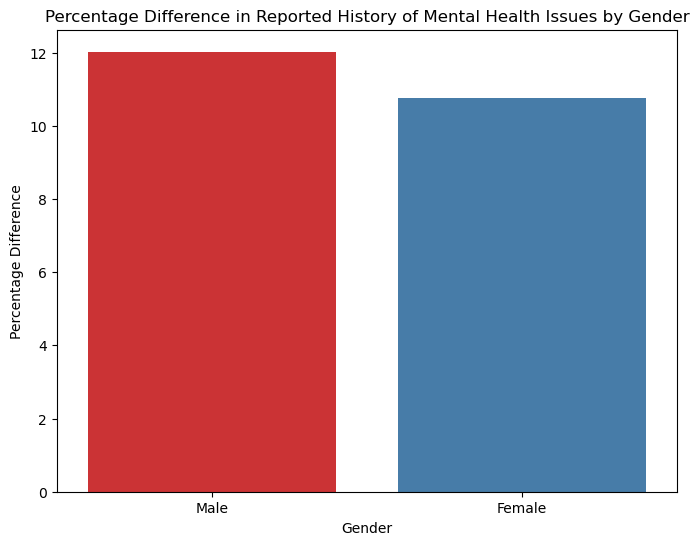

In [6]:
# Get the counts
count_male_yes = len(males_yes)
count_male_no = len(males_no)
count_female_yes = len(female_yes)
count_female_no = len(female_no)

# Calculate percentage differences
percentage_diff_male = ((count_male_no - count_male_yes) / count_male_yes) * 100
percentage_diff_female = ((count_female_no - count_female_yes) / count_female_yes) * 100

# Create a DataFrame to hold this data for visualization
data = {
    'Gender': ['Male', 'Female'],
    'Percentage Difference': [percentage_diff_male, percentage_diff_female]
}

percentage_diff_df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data=percentage_diff_df, x='Gender', y='Percentage Difference', palette='Set1')
plt.title('Percentage Difference in Reported History of Mental Health Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage Difference')
plt.show()

In [7]:
# Descriptive statistics for Mental_Health_History by Gender
filtered_df = short_df[short_df['Mental_Health_History'] != 'Maybe']
gender_mental_health_counts = filtered_df.groupby(['Gender', 'Mental_Health_History']).size().unstack(fill_value=0)
gender_mental_health_counts

Mental_Health_History,No,Yes
Gender,,
Female,3331,3007
Male,3614,3226


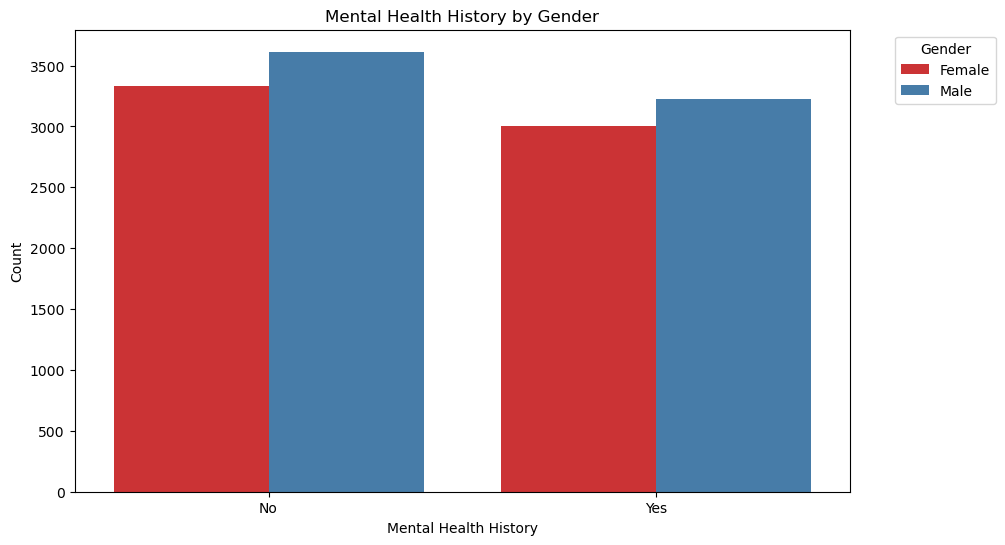

In [8]:
# Bar plot to show counts of Mental_Health_History by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Mental_Health_History', hue='Gender', palette='Set1')
plt.title('Mental Health History by Gender')
plt.xlabel('Mental Health History')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

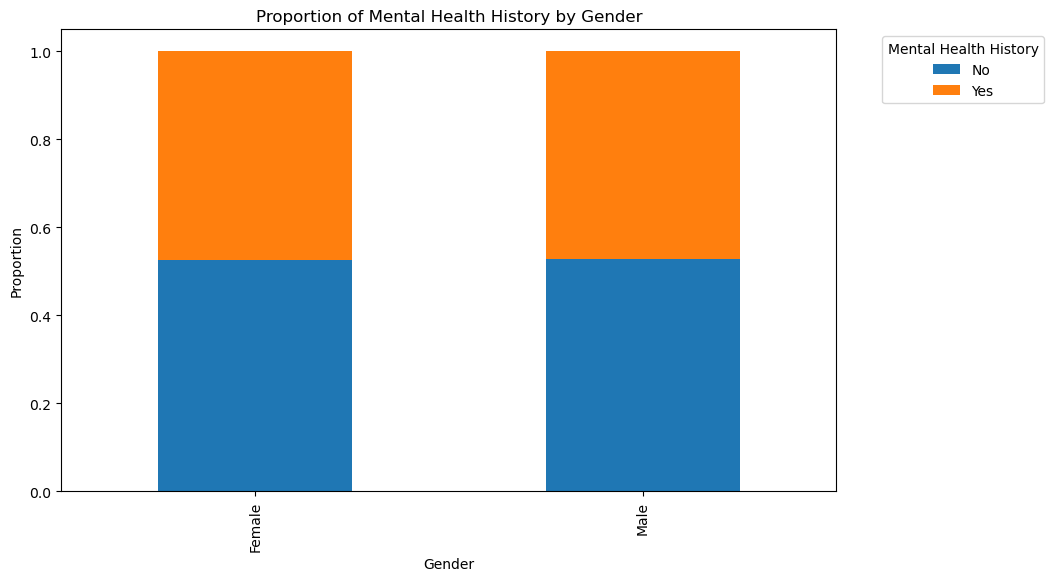

In [9]:
# Filter out the rows where 'Mental_Health_History' is 'Maybe'
filtered_df = short_df[short_df['Mental_Health_History'] != 'Maybe']

# Create a count DataFrame
gender_mental_health_counts = filtered_df.groupby(['Gender', 'Mental_Health_History']).size().unstack()

# Calculate proportions
gender_mental_health_proportions = gender_mental_health_counts.div(gender_mental_health_counts.sum(axis=1), axis=0)

# Plot proportions
gender_mental_health_proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Mental Health History by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.legend(title='Mental Health History', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [10]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared test
chi2_stat, p_val, dof, expected = chi2_contingency(gender_mental_health_proportions)
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant association between gender and mental health history.")
else:
    print("There is no significant association between gender and mental health history.")

Chi-Squared Statistic: 0.0
P-value: 1.0
There is no significant association between gender and mental health history.


In [ ]:
# Interpretation:
# * The code systematically explores the relationship between gender and mental health history using various data manipulation techniques and visualizations.
# * It highlights differences in the counts and proportions of reported mental health issues between males and females.
# * Finally, a statistical test is conducted to assess the significance of the observed differences, providing an evidence-based conclusion.
# * There is no significant association between gender and history of mental health. 